# INF5007 Neural Networks / Neuroniniai tinklai
**LAB8, Part 1**

## HOMEWORK TASK

You can use LSTM networks and autoencoders in your individual work.

In [7]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

## Autoencoders structure

Autoencoders are a class of Unsupervised Networks that consist of two major networks: Encoders and Decoders.

<img src="img/autoencoders.png" 
     width=750 height=350 
     style="display: block; margin: 0 auto"/>

The Encoder generally uses a series of Dense and/or Convolutional layers to encode an image or a vector into a fixed length vector that represents it in a compact form. Decoder uses Dense and/or Convolutional layers to convert the latent representation vector back into that same or modified image or vector.

## Autoencoders for image compression

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 16s 1us/step


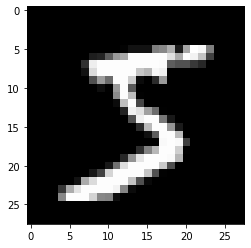

In [5]:
plt.imshow(x_train[0], cmap = "gray")
plt.show()

### Setting the latent size

Latent size is the size of the vector holding the information after compression. If this value is too small, there won’t be enough data for reconstruction and if the value is too large, overfitting can occur.

In [6]:
LATENT_SIZE = 32

### Creating the Encoder

In [20]:
from keras.layers import LeakyReLU as LR

encoder = keras.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(512),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(256),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(128),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(64),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(LATENT_SIZE),
    LR()
])

### Creating the Decoder

In [21]:
decoder = keras.Sequential([
    layers.Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(128),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(256),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(512),
    LR(),
    layers.Dropout(0.5),
    layers.Dense(784),
    layers.Activation("sigmoid"),
    layers.Reshape((28, 28))
])

### Defining the full model

In [22]:
img = layers.Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)

model = keras.Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

### Training the model

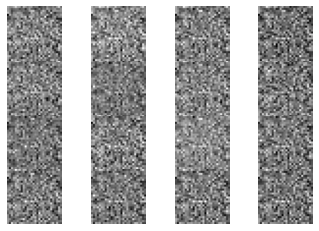

----------- EPOCH 0 -----------
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2364


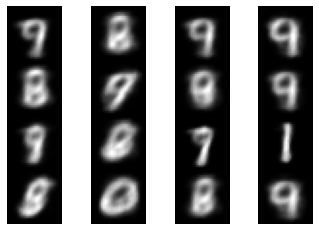

----------- EPOCH 1 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2104


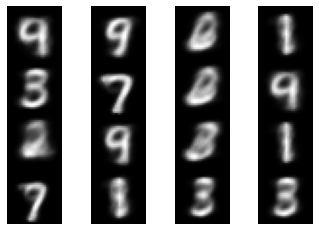

----------- EPOCH 2 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2036


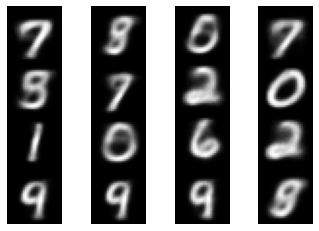

----------- EPOCH 3 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2003


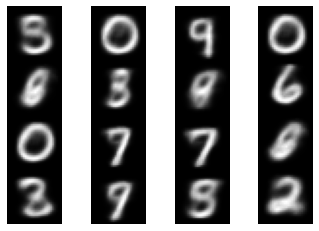

----------- EPOCH 4 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1984


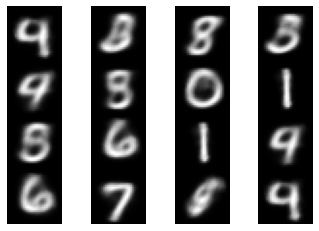

----------- EPOCH 5 -----------
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1972


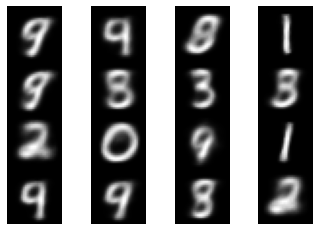

----------- EPOCH 6 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1967


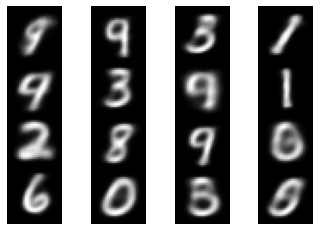

----------- EPOCH 7 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1961


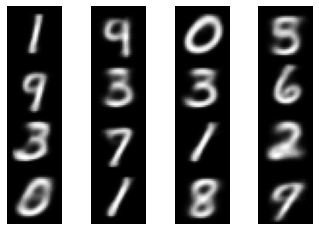

----------- EPOCH 8 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1956


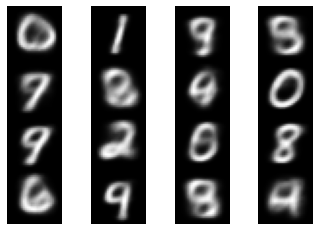

----------- EPOCH 9 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1953


In [23]:
EPOCHS = 10

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)